In [1]:
import pandas as pd
import sqlite3
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

conn = sqlite3.connect("./data/output/home_ahead.db")
cur = conn.cursor()

In [2]:
ahead_df = pd.read_sql_query("select * from processed_data;", conn)

In [3]:
ahead_df.head()

,GAME_ID,total_events,home_ahead,pct_home_ahead,period_1_events,period_2_events,period_3_events,period_4_events,period_5_events,period_6_events,...,period_3_avg_margin,period_4_avg_margin,period_5_avg_margin,period_6_avg_margin,period_7_avg_margin,total_avg_margin,home_win,period_8_events,period_8_ahead,period_8_avg_margin
0,20001149,167,15,0.089820,33.0,37.0,43.0,35.0,19.0,NaN,...,-5.953488,-0.971429,-3.315789,NaN,NaN,-4.299401,0,NaN,NaN,NaN
1,20000923,161,78,0.484472,28.0,37.0,31.0,23.0,15.0,13.0,...,3.903226,-6.086957,-0.066667,-0.538462,7.214286,1.099379,1,NaN,NaN,NaN
2,20000936,155,109,0.703226,29.0,40.0,35.0,36.0,15.0,NaN,...,7.628571,3.444444,-2.666667,NaN,NaN,2.832258,0,NaN,NaN,NaN
3,20000432,155,155,1.000000,32.0,39.0,35.0,49.0,NaN,NaN,...,16.685714,9.979592,NaN,NaN,NaN,15.077419,1,NaN,NaN,NaN
4,20001024,151,30,0.198675,30.0,34.0,32.0,41.0,14.0,NaN,...,-8.218750,-0.463415,2.857143,NaN,NaN,-4.576159,1,NaN,NaN,NaN


In [4]:
len(ahead_df)

20505

In [5]:
ahead_df['GAME_ID'].unique()

array([20001149, 20000923, 20000936, ..., 21700283, 21700079, 21701058])

In [6]:
def year_parse(row):
    '''returns year for the start of the season based on the game id,
       since we know these are all year 2000 and beyond we hardcode the prefix
    '''
    game_id = row['GAME_ID']
    year = "20{}".format(str(game_id)[1:3])
    return year

In [7]:
ahead_df['year'] = ahead_df.apply(lambda x: year_parse(x), axis=1)

In [8]:
ahead_df.head()

,GAME_ID,total_events,home_ahead,pct_home_ahead,period_1_events,period_2_events,period_3_events,period_4_events,period_5_events,period_6_events,...,period_4_avg_margin,period_5_avg_margin,period_6_avg_margin,period_7_avg_margin,total_avg_margin,home_win,period_8_events,period_8_ahead,period_8_avg_margin,year
0,20001149,167,15,0.089820,33.0,37.0,43.0,35.0,19.0,NaN,...,-0.971429,-3.315789,NaN,NaN,-4.299401,0,NaN,NaN,NaN,2000
1,20000923,161,78,0.484472,28.0,37.0,31.0,23.0,15.0,13.0,...,-6.086957,-0.066667,-0.538462,7.214286,1.099379,1,NaN,NaN,NaN,2000
2,20000936,155,109,0.703226,29.0,40.0,35.0,36.0,15.0,NaN,...,3.444444,-2.666667,NaN,NaN,2.832258,0,NaN,NaN,NaN,2000
3,20000432,155,155,1.000000,32.0,39.0,35.0,49.0,NaN,NaN,...,9.979592,NaN,NaN,NaN,15.077419,1,NaN,NaN,NaN,2000
4,20001024,151,30,0.198675,30.0,34.0,32.0,41.0,14.0,NaN,...,-0.463415,2.857143,NaN,NaN,-4.576159,1,NaN,NaN,NaN,2000


Lets first just make sure we know the difference between games that ended in 4 periods and those that went into overtime.

In [9]:
ot_games = ahead_df.dropna(subset=['period_5_events'])

In [10]:
len(ot_games)

1283

A small fraction ((1283/20505)*100) = 6.26% of games went into overtime, let's ignore these

In [11]:
ot_games.head()

,GAME_ID,total_events,home_ahead,pct_home_ahead,period_1_events,period_2_events,period_3_events,period_4_events,period_5_events,period_6_events,...,period_4_avg_margin,period_5_avg_margin,period_6_avg_margin,period_7_avg_margin,total_avg_margin,home_win,period_8_events,period_8_ahead,period_8_avg_margin,year
0,20001149,167,15,0.089820,33.0,37.0,43.0,35.0,19.0,NaN,...,-0.971429,-3.315789,NaN,NaN,-4.299401,0,NaN,NaN,NaN,2000
1,20000923,161,78,0.484472,28.0,37.0,31.0,23.0,15.0,13.0,...,-6.086957,-0.066667,-0.538462,7.214286,1.099379,1,NaN,NaN,NaN,2000
2,20000936,155,109,0.703226,29.0,40.0,35.0,36.0,15.0,NaN,...,3.444444,-2.666667,NaN,NaN,2.832258,0,NaN,NaN,NaN,2000
4,20001024,151,30,0.198675,30.0,34.0,32.0,41.0,14.0,NaN,...,-0.463415,2.857143,NaN,NaN,-4.576159,1,NaN,NaN,NaN,2000
5,20000847,150,68,0.453333,32.0,30.0,29.0,23.0,17.0,19.0,...,4.043478,-1.882353,0.421053,NaN,0.406667,1,NaN,NaN,NaN,2000


In [12]:
no_ot_df = ahead_df[ahead_df['period_5_events'].isna()]

In [13]:
len(no_ot_df)

19222

In [14]:
len(no_ot_df[(no_ot_df.period_4_ahead < 4) & (no_ot_df.home_win == 1)].home_win)

84

In [15]:
len(no_ot_df[(no_ot_df.period_4_ahead < 10) & (no_ot_df.home_win == 1)].home_win)

429

In [16]:
no_ot_df.describe()

,GAME_ID,total_events,home_ahead,pct_home_ahead,period_1_events,period_2_events,period_3_events,period_4_events,period_5_events,period_6_events,...,period_3_avg_margin,period_4_avg_margin,period_5_avg_margin,period_6_avg_margin,period_7_avg_margin,total_avg_margin,home_win,period_8_events,period_8_ahead,period_8_avg_margin
count,1.922200e+04,19222.000000,19222.000000,19222.000000,19222.000000,19222.000000,19222.000000,19222.000000,0.0,0.0,...,19222.000000,19222.000000,0.0,0.0,0.0,19222.000000,19222.000000,0.0,0.0,0.0
mean,2.080965e+07,116.864322,64.354073,0.550088,27.810374,29.637343,29.257465,30.159141,NaN,NaN,...,2.370167,3.079925,NaN,NaN,NaN,1.920179,0.601706,NaN,NaN,NaN
std,5.005453e+05,11.850622,41.281502,0.346082,4.729705,5.057316,5.024050,5.807475,NaN,NaN,...,11.199480,12.829109,NaN,NaN,NaN,8.439207,0.489559,NaN,NaN,NaN
min,2.000000e+07,77.000000,0.000000,0.000000,11.000000,11.000000,12.000000,13.000000,NaN,NaN,...,-41.593750,-51.230769,NaN,NaN,NaN,-34.882353,0.000000,NaN,NaN,NaN
25%,2.040040e+07,109.000000,25.000000,0.219298,25.000000,26.000000,26.000000,26.000000,NaN,NaN,...,-5.000000,-5.551724,NaN,NaN,NaN,-3.735281,0.000000,NaN,NaN,NaN
50%,2.080060e+07,116.000000,69.000000,0.596837,28.000000,29.000000,29.000000,30.000000,NaN,NaN,...,2.365152,3.382738,NaN,NaN,NaN,2.020287,1.000000,NaN,NaN,NaN
75%,2.120104e+07,124.000000,101.000000,0.887188,31.000000,33.000000,32.000000,34.000000,NaN,NaN,...,9.817340,11.554598,NaN,NaN,NaN,7.565804,1.000000,NaN,NaN,NaN
max,2.170123e+07,173.000000,171.000000,1.000000,48.000000,51.000000,52.000000,61.000000,NaN,NaN,...,47.086957,59.636364,NaN,NaN,NaN,37.025000,1.000000,NaN,NaN,NaN


Lets have a look at distribution of number of events where home team was ahead in the fourth period (binned in 10s) by whether they won or lost

In [17]:
p4_win_bins = pd.cut(no_ot_df[no_ot_df.home_win==1]['period_4_ahead'], [0, 10, 20, 30, 40, 50, 60, 70])

In [18]:
p4_loss_bins = pd.cut(no_ot_df[no_ot_df.home_win==0]['period_4_ahead'], [0, 10, 20, 30, 40, 50, 60, 70])

In [19]:
no_ot_df[no_ot_df.home_win==1].groupby(p4_win_bins)['period_4_ahead'].agg(['count'])

,count
period_4_ahead,
"(0, 10]",505
"(10, 20]",1405
"(20, 30]",5727
"(30, 40]",3580
"(40, 50]",333
"(50, 60]",15
"(60, 70]",1


In [20]:
no_ot_df[no_ot_df.home_win==0].groupby(p4_loss_bins)['period_4_ahead'].agg(['count'])

,count
period_4_ahead,
"(0, 10]",1633
"(10, 20]",658
"(20, 30]",274
"(30, 40]",20
"(40, 50]",1
"(50, 60]",0
"(60, 70]",0


In [21]:
from pandas.plotting import scatter_matrix

In [22]:
no_ot_clipped = no_ot_df[['GAME_ID', 'total_events', 'year', 'home_ahead', 'pct_home_ahead', 'period_1_events', 'period_2_events', 'period_3_events', 'period_4_events', 'period_1_ahead', 'period_2_ahead', 'period_3_ahead', 'period_4_ahead', 'total_avg_margin', 'period_1_avg_margin', 'period_2_avg_margin', 'period_3_avg_margin', 'period_4_avg_margin', 'home_win']]

In [23]:
no_ot_clipped.head()

,GAME_ID,total_events,year,home_ahead,pct_home_ahead,period_1_events,period_2_events,period_3_events,period_4_events,period_1_ahead,period_2_ahead,period_3_ahead,period_4_ahead,total_avg_margin,period_1_avg_margin,period_2_avg_margin,period_3_avg_margin,period_4_avg_margin,home_win
3,20000432,155,2000,155,1.000000,32.0,39.0,35.0,49.0,32.0,39.0,35.0,49.0,15.077419,12.281250,22.333333,16.685714,9.979592,1
7,20000290,149,2000,64,0.429530,39.0,40.0,31.0,39.0,15.0,2.0,18.0,29.0,-0.268456,0.128205,-5.925000,1.064516,4.076923,1
9,20001172,149,2000,63,0.422819,37.0,33.0,34.0,45.0,29.0,7.0,0.0,27.0,-3.093960,2.729730,-2.242424,-11.647059,-2.044444,1
15,20000907,146,2000,144,0.986301,39.0,34.0,38.0,35.0,37.0,34.0,38.0,35.0,7.493151,4.051282,7.588235,5.552632,13.342857,1
17,20001140,144,2000,100,0.694444,36.0,35.0,31.0,42.0,23.0,22.0,18.0,37.0,1.972222,1.166667,1.257143,0.580645,4.285714,1


And let's appluy a scatter matrix to see if there are any meaningful correlations

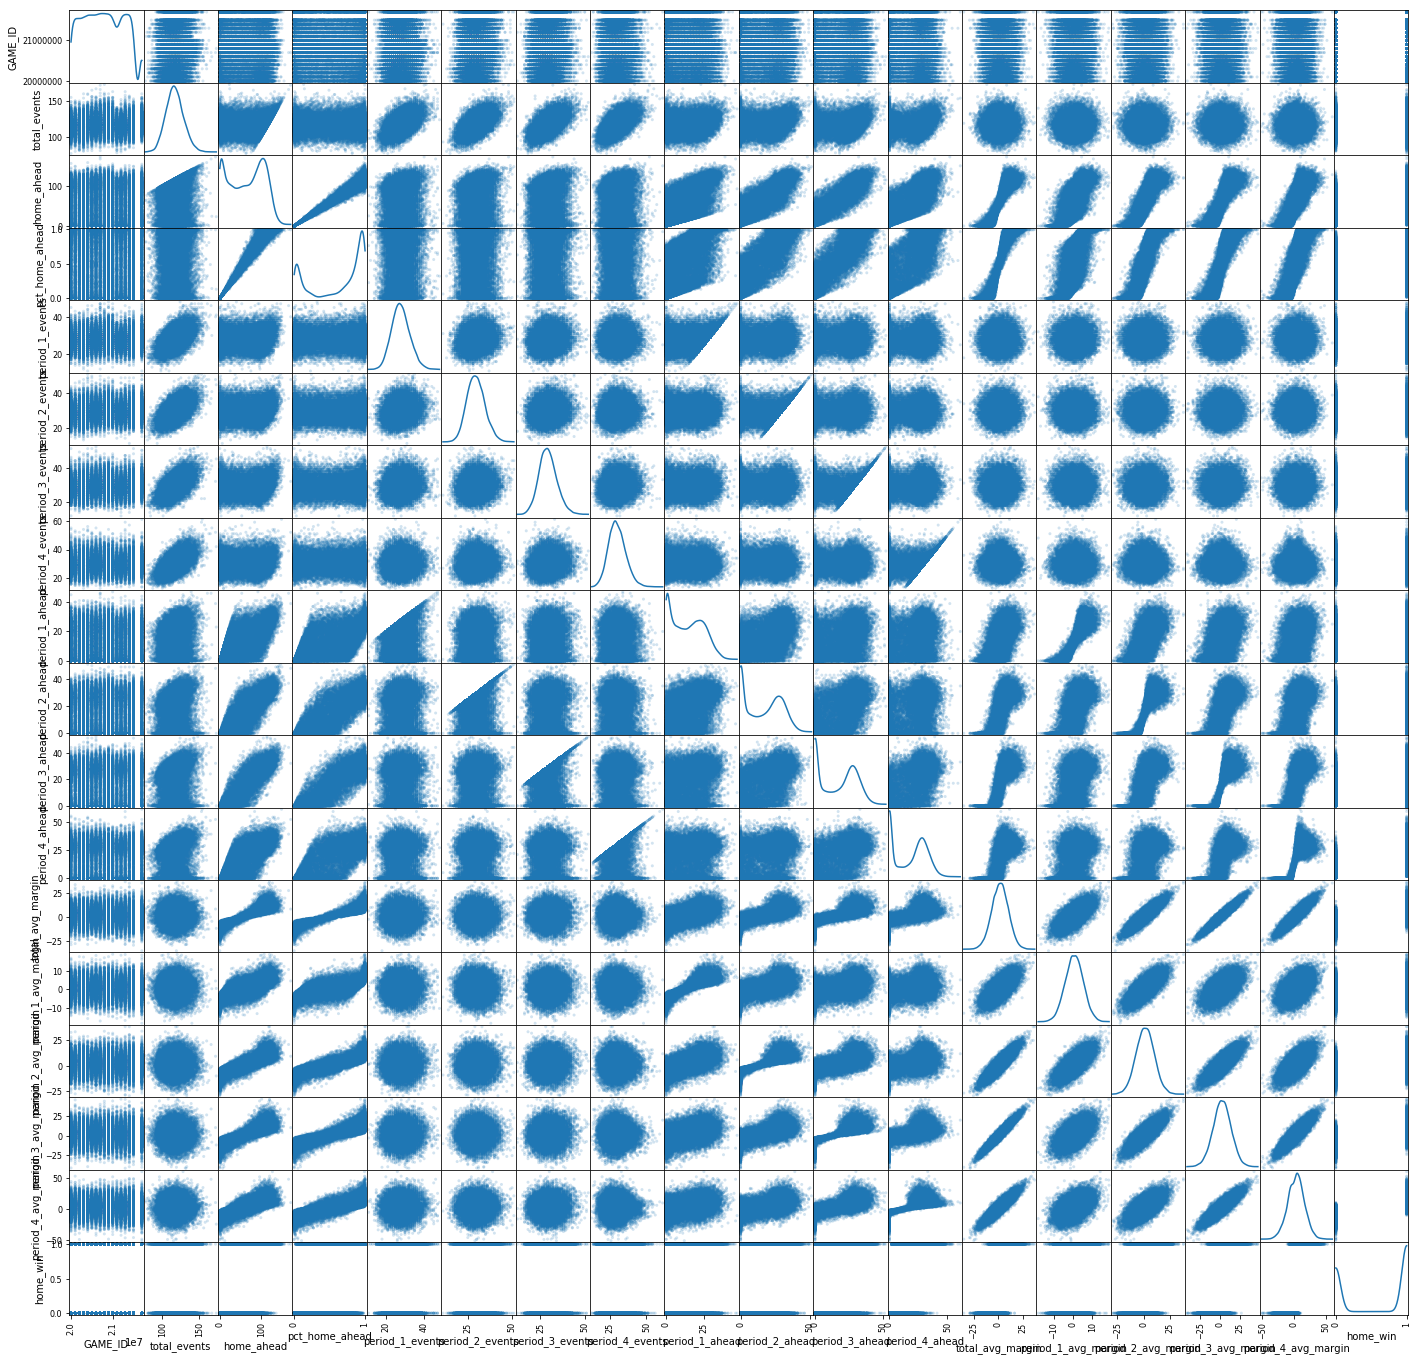

In [24]:
axs = scatter_matrix(no_ot_clipped, alpha=0.2, diagonal='kde', figsize=(24,24))

This doesn't really tell us much, which means we probably would need to manipulate our data a little more

Let's head back to the top and see about percentage of game spent ahead and whether home team won or not

In [25]:
total_ahead_bins_win = pd.cut(no_ot_df[no_ot_df.home_win==1]['pct_home_ahead'], [0, .10, .20, .30, .40, .50, .60, .70, .80, .90, 1])

In [26]:
total_ahead_bins_loss = pd.cut(no_ot_df[no_ot_df.home_win==0]['pct_home_ahead'], [0, .10, .20, .30, .40, .50, .60, .70, .80, .90, 1])

In [27]:
no_ot_df[no_ot_df.home_win==1].groupby(total_ahead_bins_win)['pct_home_ahead'].agg(['count'])

,count
pct_home_ahead,
"(0.0, 0.1]",124
"(0.1, 0.2]",288
"(0.2, 0.3]",417
"(0.3, 0.4]",540
"(0.4, 0.5]",717
"(0.5, 0.6]",809
"(0.6, 0.7]",1043
"(0.7, 0.8]",1363
"(0.8, 0.9]",1825


In [28]:
no_ot_df[no_ot_df.home_win==0].groupby(total_ahead_bins_loss)['pct_home_ahead'].agg(['count'])

,count
pct_home_ahead,
"(0.0, 0.1]",2194
"(0.1, 0.2]",1141
"(0.2, 0.3]",901
"(0.3, 0.4]",694
"(0.4, 0.5]",577
"(0.5, 0.6]",454
"(0.6, 0.7]",338
"(0.7, 0.8]",309
"(0.8, 0.9]",207


So we have a sensefor the distribution of how being ahead or not, for what percentage of a game, will impact a win or a loss.

But what do we call a comeback. We'll want to have a standard measure of what is considered a comeback. That is, if a team is trailing by 1-3 points for the entirety of the game and either win or lose, that's probably not a comeback. We'll want a threshold by which a team overcame a considerable, negative score margin, sustained over a majority of a period or periods, to win the game.

For this we might need some other things, such as the average score margin over all as well as per period.

### Probability of home team win/loss

In [42]:
win_prob = ahead_df.groupby('home_win').size().div(len(ahead_df))

In [43]:
def down_by_five(row, col):
    dbf = 0
    if row[col] <= -5:
        dbf = 1
    return dbf

In [44]:
ahead_df['dbf_1_period'] = ahead_df.apply(lambda x: down_by_five(x, 'period_1_avg_margin'), axis=1)
ahead_df['dbf_2_period'] = ahead_df.apply(lambda x: down_by_five(x, 'period_2_avg_margin'), axis=1)
ahead_df['dbf_3_period'] = ahead_df.apply(lambda x: down_by_five(x, 'period_3_avg_margin'), axis=1)
ahead_df['dbf_4_period'] = ahead_df.apply(lambda x: down_by_five(x, 'period_4_avg_margin'), axis=1)

In [45]:
ahead_df.groupby(['home_win', 'dbf_1_period']).size().div(len(ahead_df)).div(win_prob, axis=0, level='dbf_1_period')

home_win  dbf_1_period
0         0               0.799128
          1               0.135336
1         0               1.390477
          1               0.063179
dtype: float64

In [46]:
ahead_df.groupby(['home_win', 'dbf_2_period']).size().div(len(ahead_df)).div(win_prob, axis=0, level='dbf_2_period')

home_win  dbf_2_period
0         0               0.588079
          1               0.277528
1         0               1.339835
          1               0.097298
dtype: float64

In [47]:
ahead_df.groupby(['home_win', 'dbf_3_period']).size().div(len(ahead_df)).div(win_prob, axis=0, level='dbf_3_period')

home_win  dbf_3_period
0         0               0.480252
          1               0.350175
1         0               1.387691
          1               0.065056
dtype: float64

In [48]:
ahead_df.groupby(['home_win', 'dbf_4_period']).size().div(len(ahead_df)).div(win_prob, axis=0, level='dbf_4_period')

home_win  dbf_4_period
0         0               0.385268
          1               0.414170
1         0               1.469227
          1               0.010122
dtype: float64